In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [2]:
# Reading the CSV file
df = pd.read_csv("PIMA diabetes.csv")

In [3]:
# Exploratory Data Analysis (EDA)
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Printing top 5 rows
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
#Describe the data
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [13]:
# With transpose
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [14]:
# Count zero values in each column
zero_counts = df.eq(0).sum()

print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [15]:
# will replace 0 value in dataframe with value   
df['Glucose'] = df['Glucose'].replace(to_replace = 0, value = df['Glucose'].mean())  
df['BloodPressure'] = df['BloodPressure'].replace(to_replace = 0, value = df['BloodPressure'].mean() )  
df['SkinThickness'] = df['SkinThickness'].replace(to_replace = 0, value = df['SkinThickness'].median())  
df['Insulin'] = df['Insulin'].replace(to_replace = 0, value = df['Insulin'].median())  
df['BMI'] = df['BMI'].replace(to_replace = 0, value = df['BMI'].median())  

In [16]:
zero_counts = df.eq(0).sum()
zero_counts

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [17]:
#Correlation 
df_corr = df.corr()
df_corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.032568   
Glucose                      0.127964  1.000000       0.219666       0.172361   
BloodPressure                0.208984  0.219666       1.000000       0.152458   
SkinThickness                0.032568  0.172361       0.152458       1.000000   
Insulin                     -0.055697  0.357081      -0.022049       0.238188   
BMI                          0.021546  0.231469       0.281232       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.142977   
Age                          0.544341  0.266600       0.326740       0.054514   
Outcome                      0.221898  0.492908       0.162986       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357081  0.231469                  0.137106   
BloodPressure            -0.022049  0.281232                  0.000371   
SkinThickness             0.238188  0.546951                  0.142977   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   
Outcome                   0.148457  0.312249                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.054514  0.189065  
Insulin                  -0.015413  0.148457  
BMI                       0.025744  0.312249  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

Text(0.5, 1.0, 'Feature Correlation')

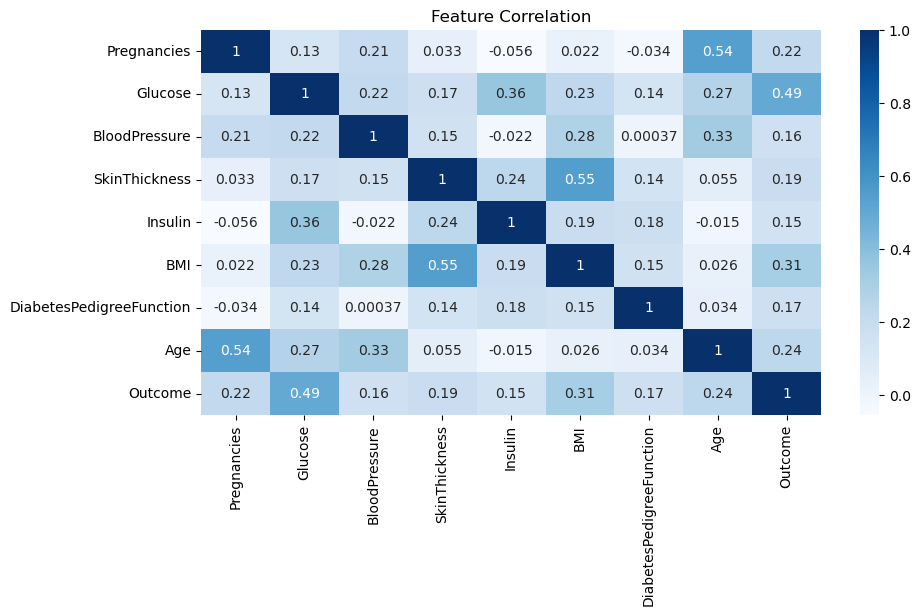

In [18]:
#Correlation plot
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation")

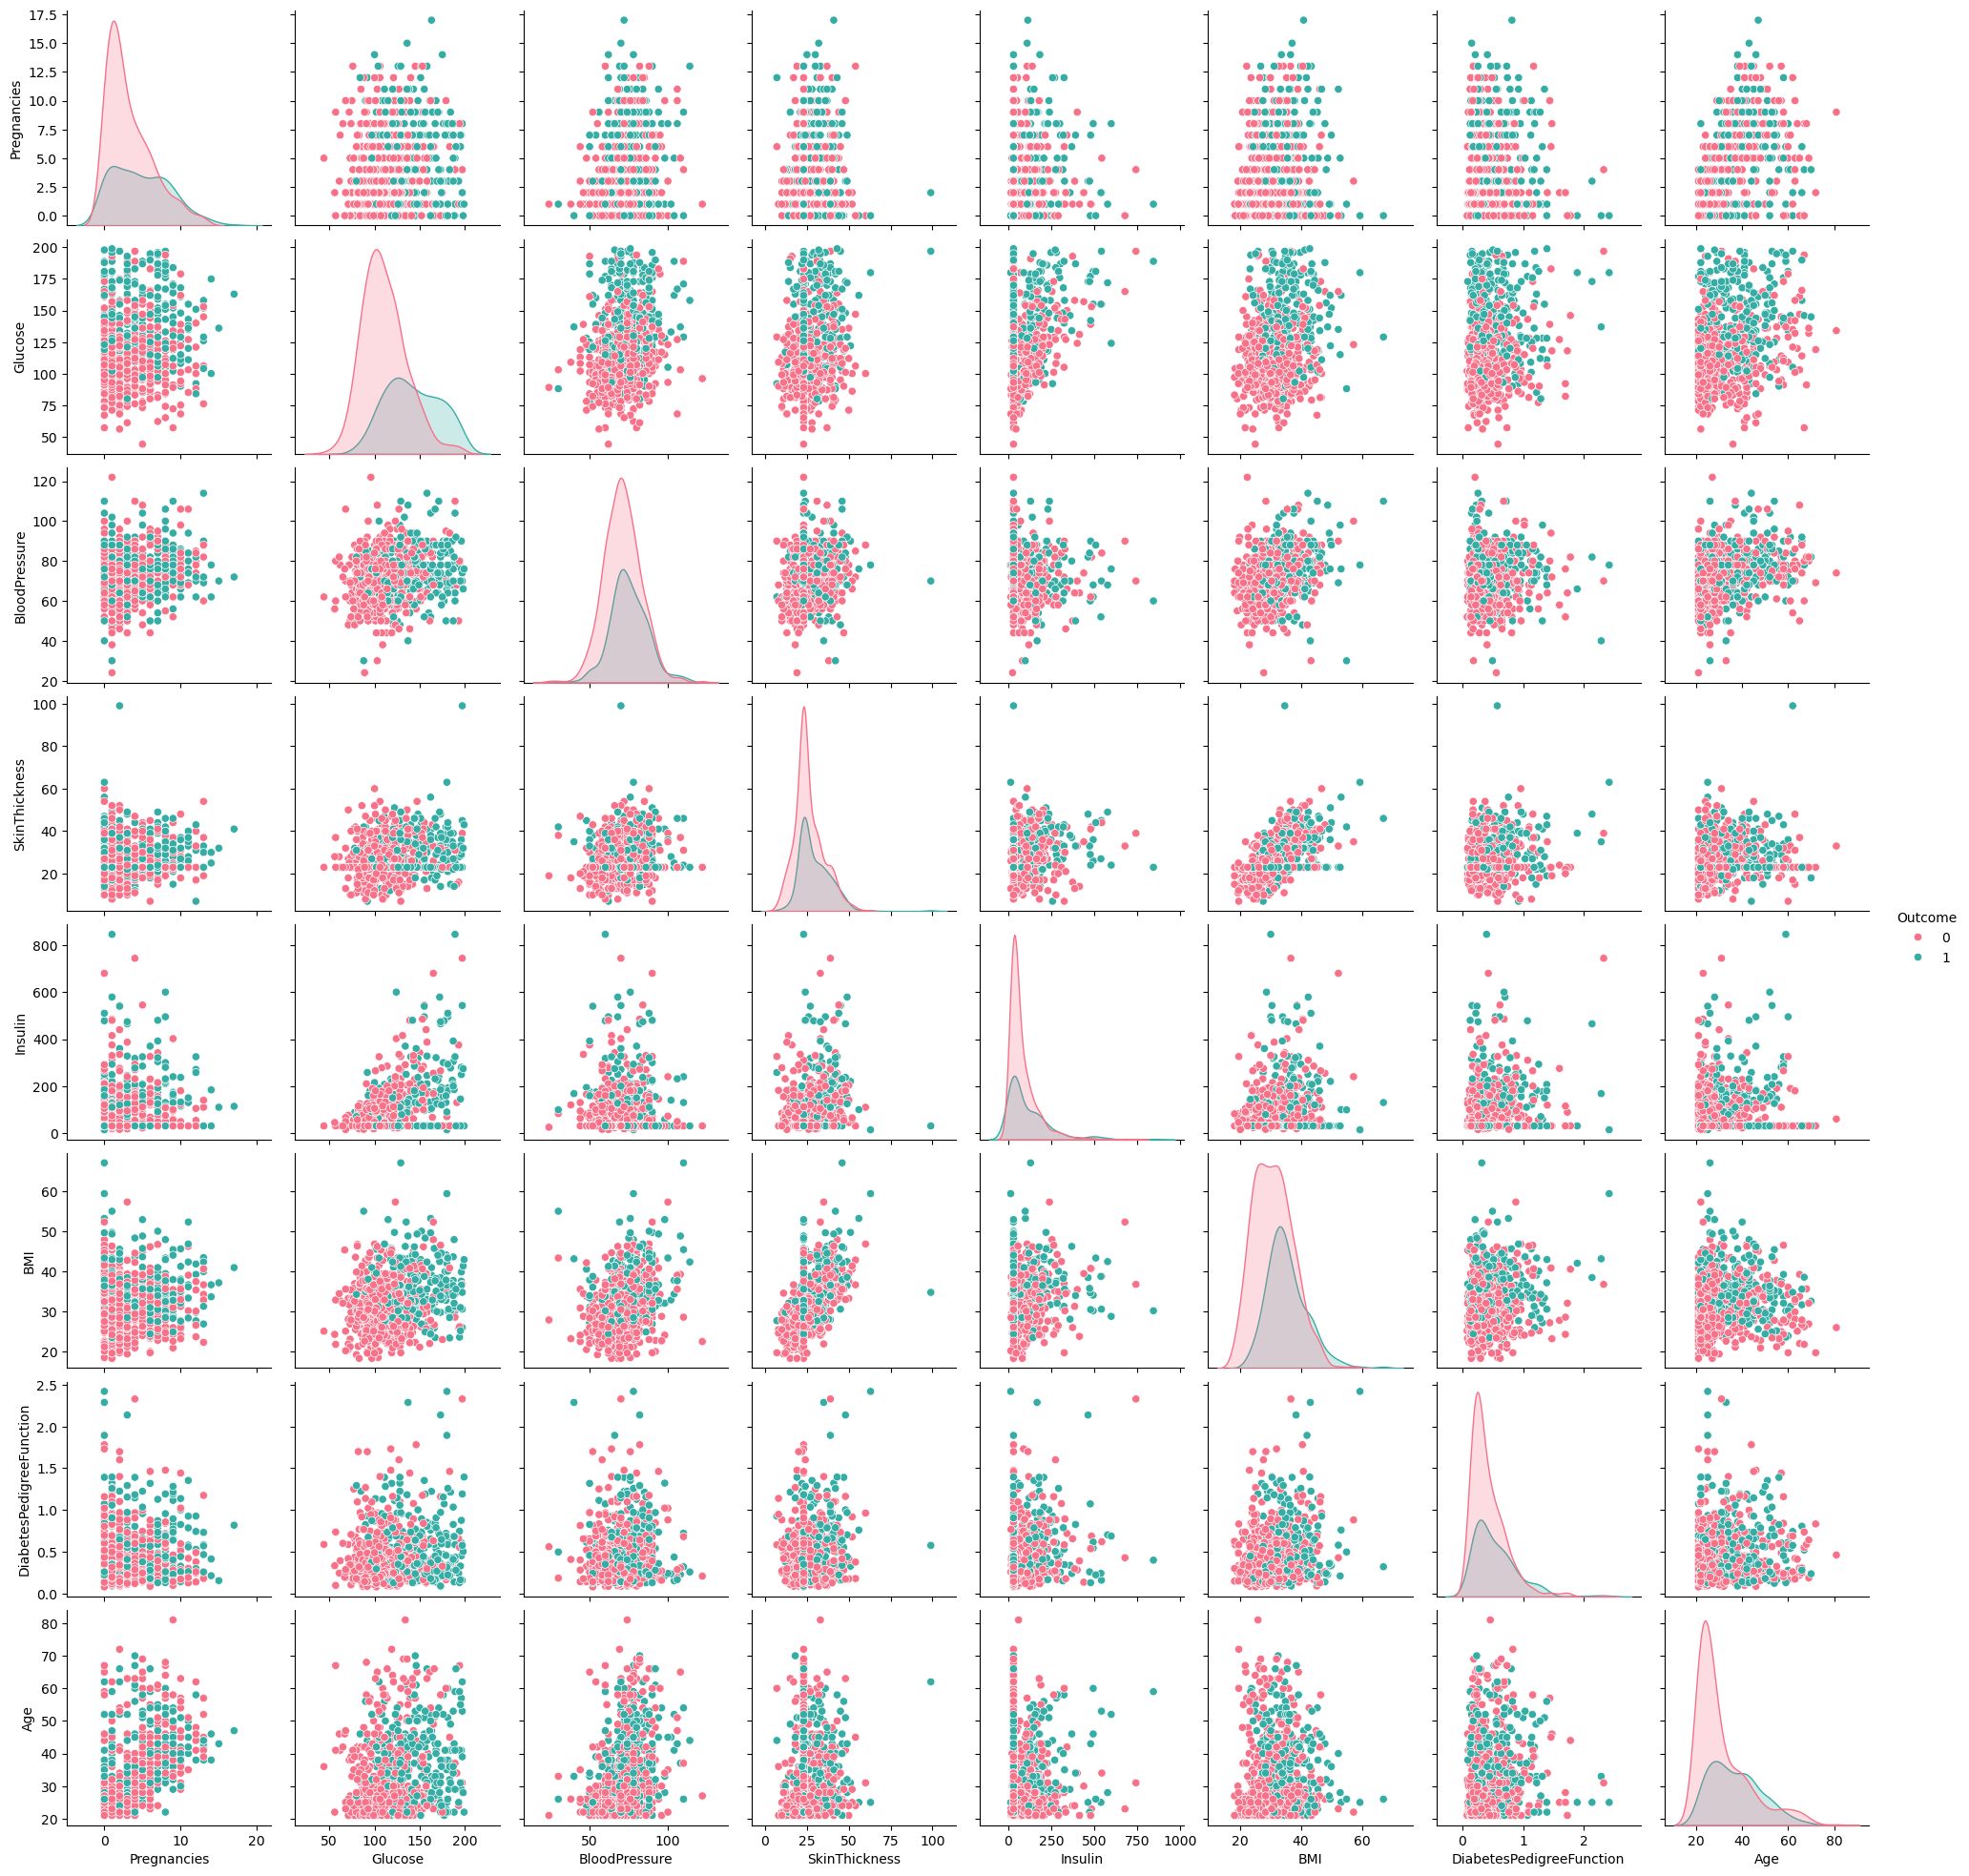

In [19]:
sns.pairplot(df, hue='Outcome', palette="husl")

<Axes: xlabel='Outcome'>

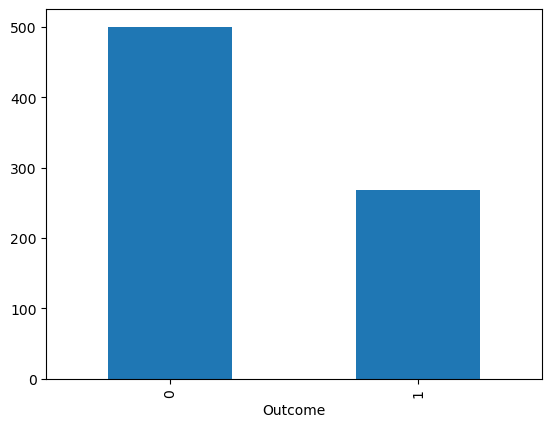

In [20]:
df.Outcome.value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Distribution of Outcome')

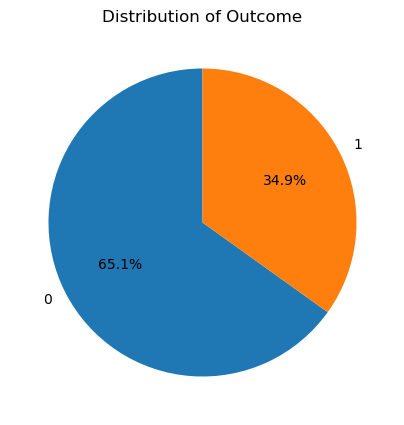

In [21]:
# count the number of samples for each species
outcome_counts = df['Outcome'].value_counts()

# create a pie chart
plt.figure(figsize=(5,5))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Outcome")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

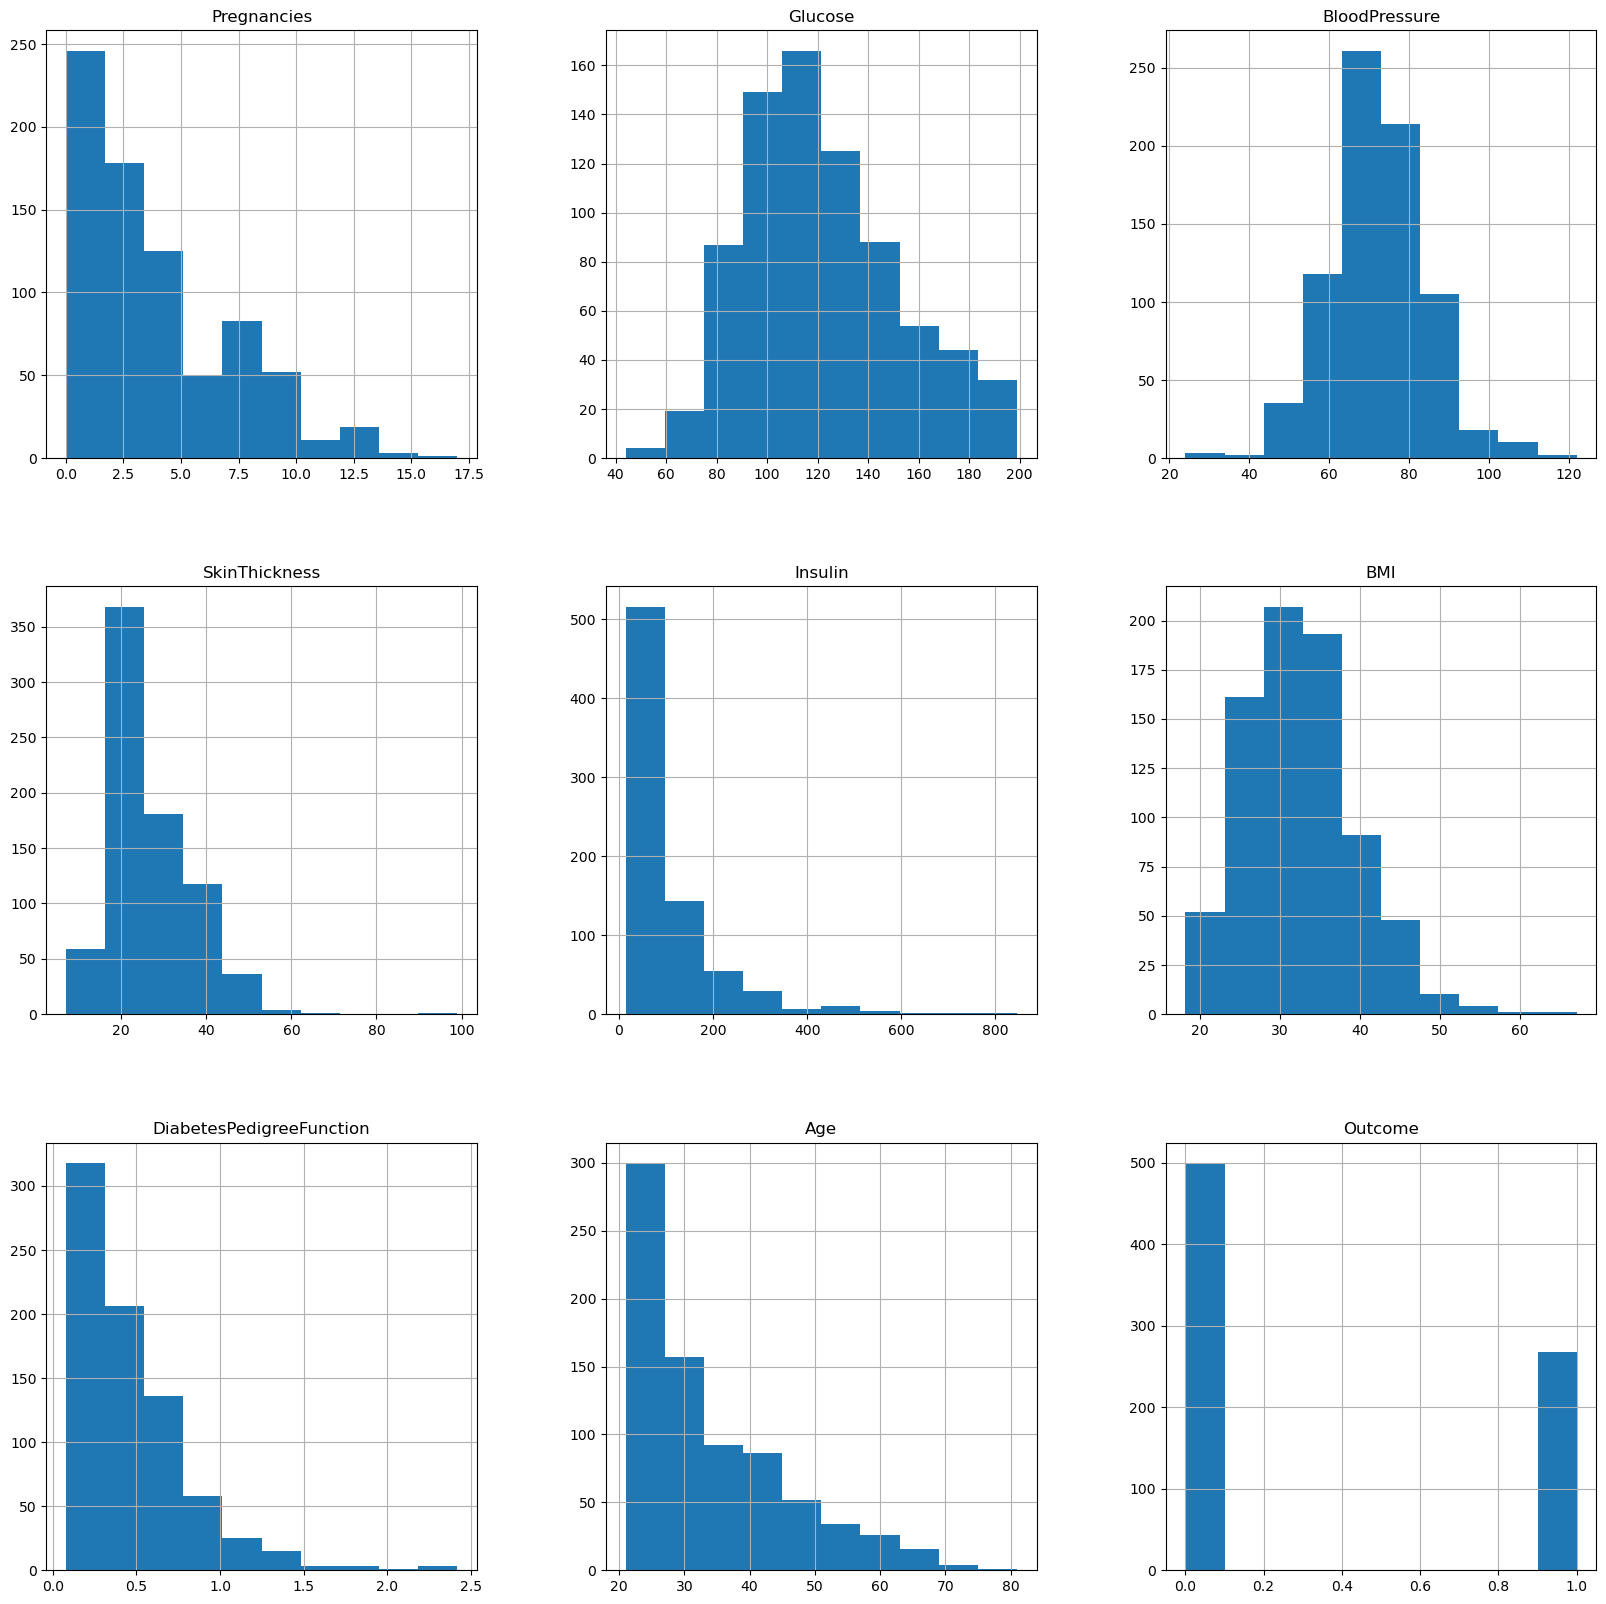

In [22]:
df.hist(figsize = (20,20))

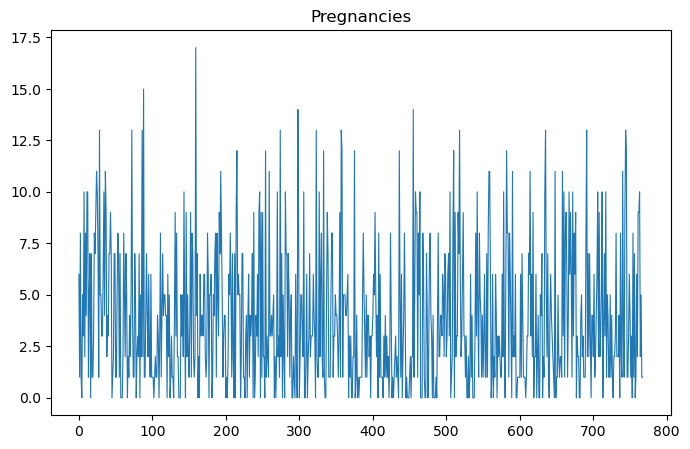

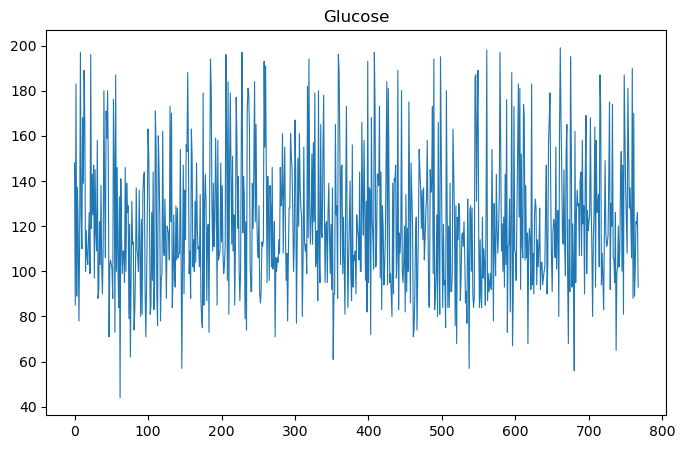

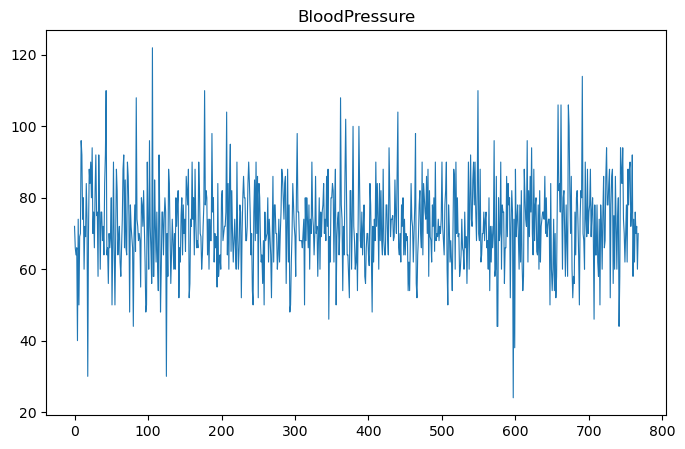

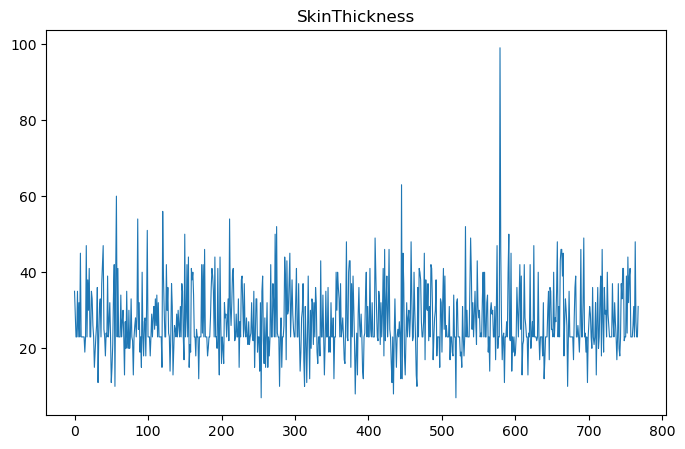

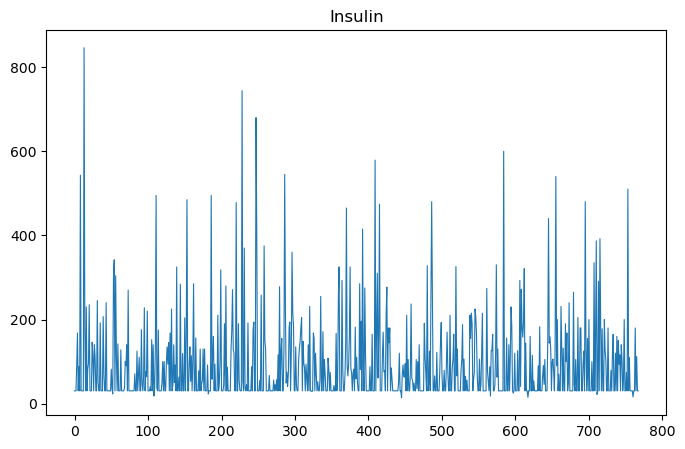

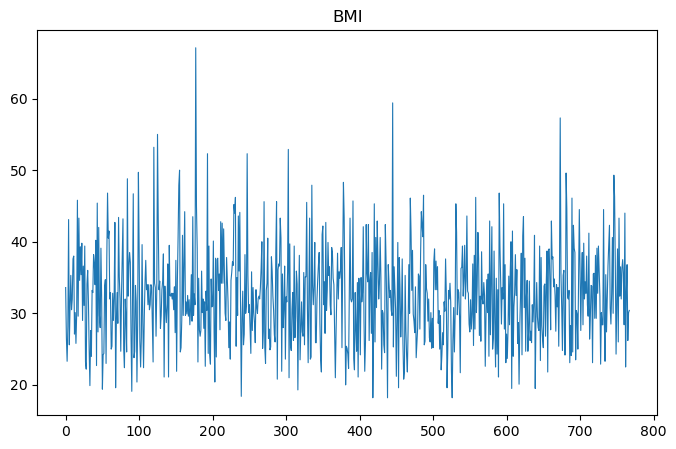

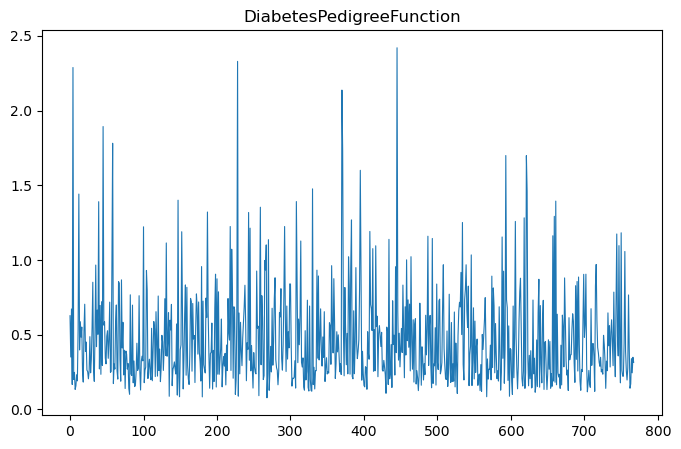

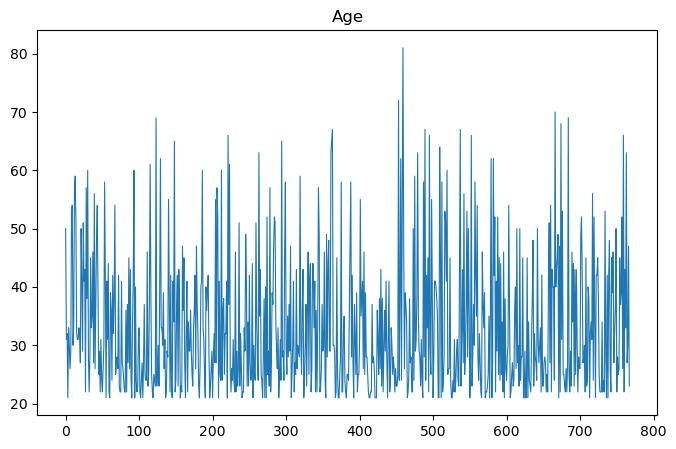

In [23]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    plt.figure(figsize = (8,5))
    df[i].plot.line(title=i, linewidth = '0.8')
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


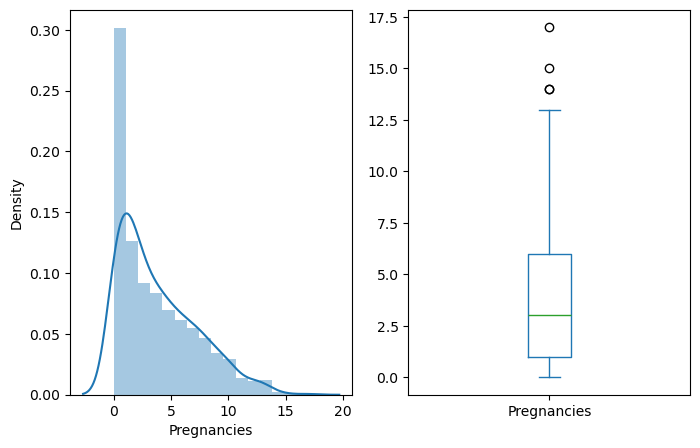

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


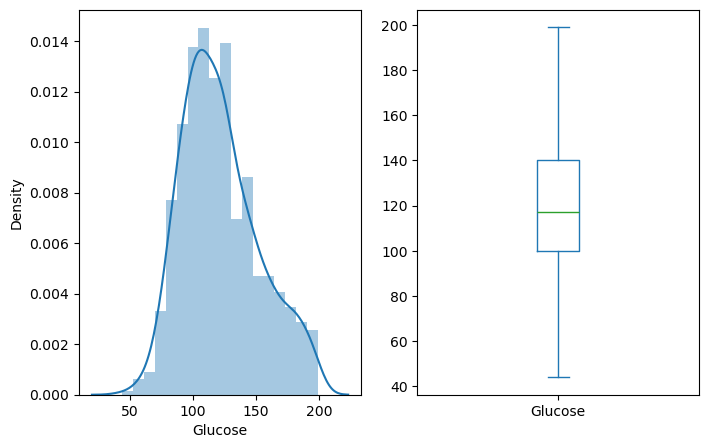

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


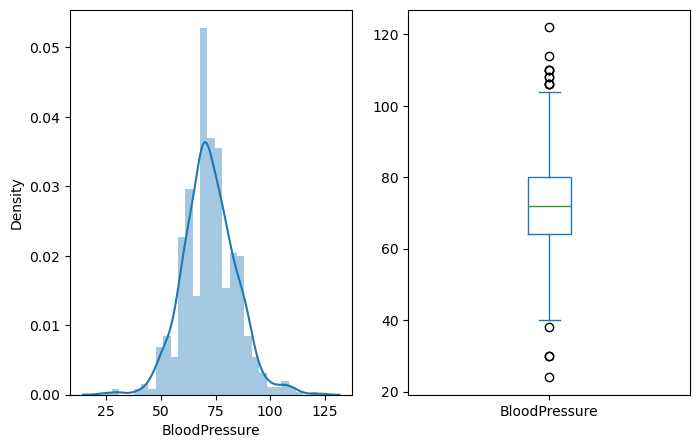

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


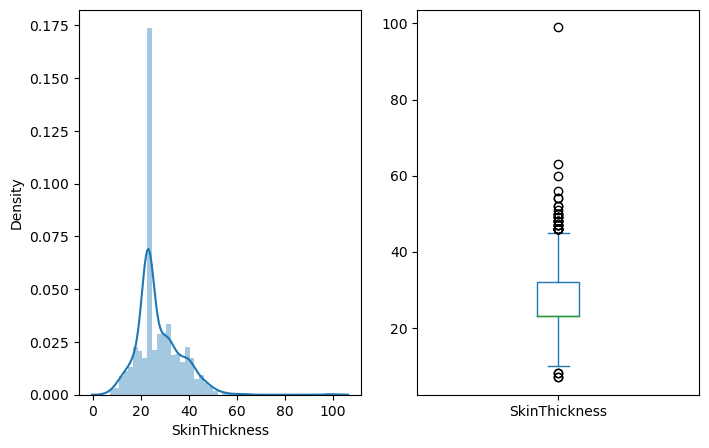

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


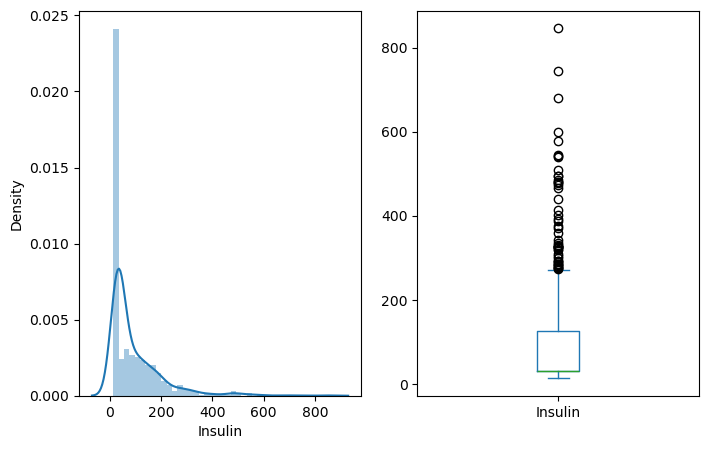

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


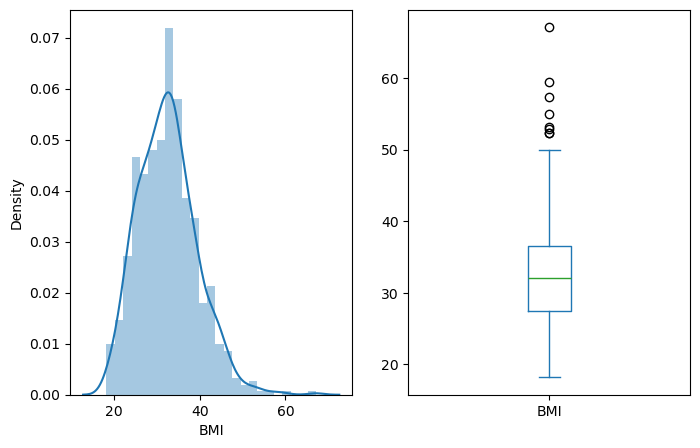

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


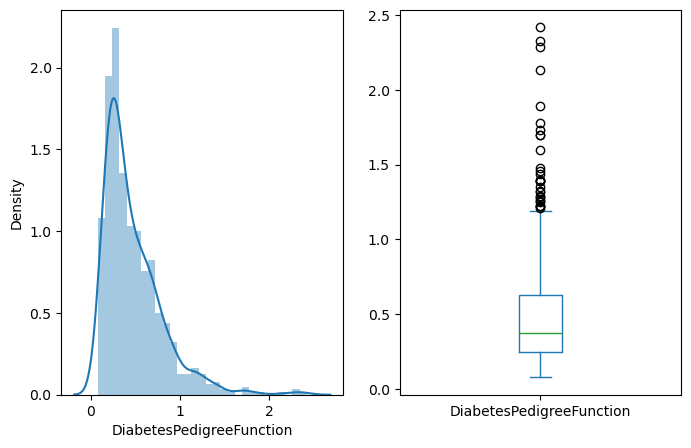

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


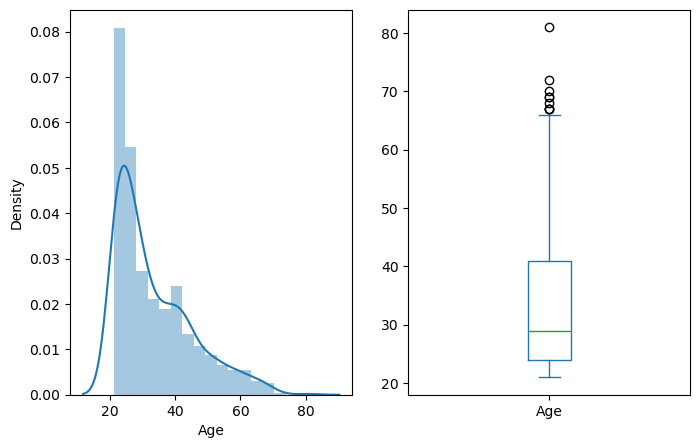

In [24]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    plt.subplot(121)
    sns.distplot(df[i])
    plt.subplot(122)
    df[i].plot.box(figsize=(8,5))
    plt.show()

In [25]:
outliers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in outliers:
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)
    IQR = q2 - q1
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR) 
    df[i] = np.where (df[i] > max_limit, max_limit, (np.where(df[i] < min_limit, min_limit, df[i])))

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


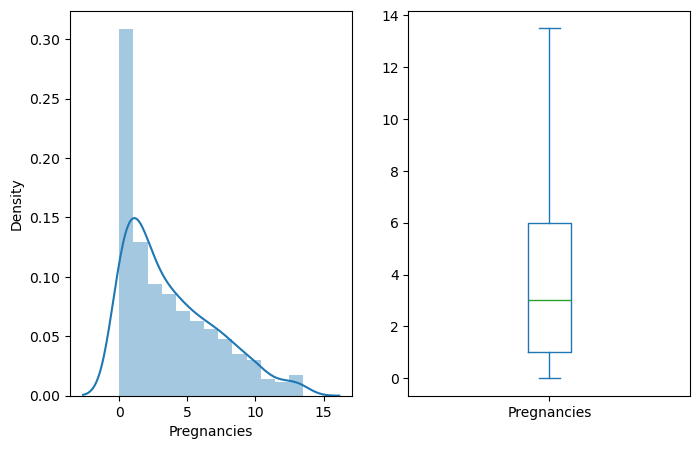

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


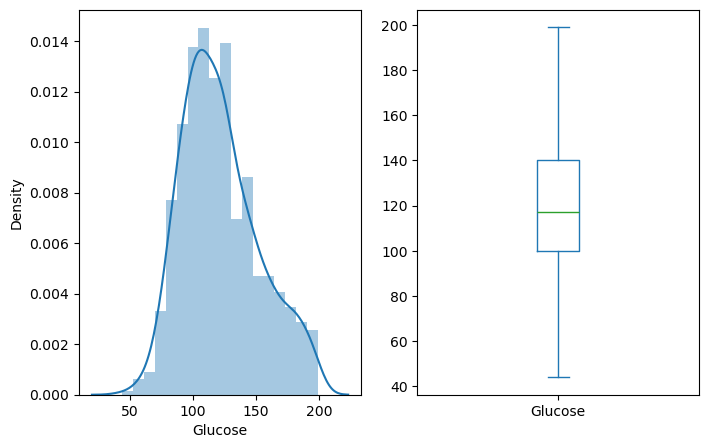

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


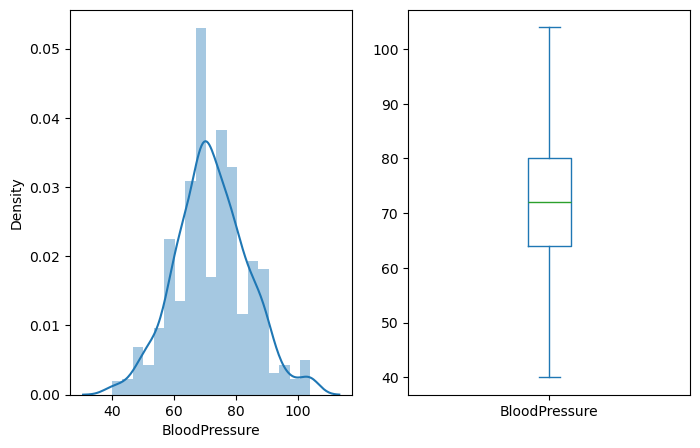

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


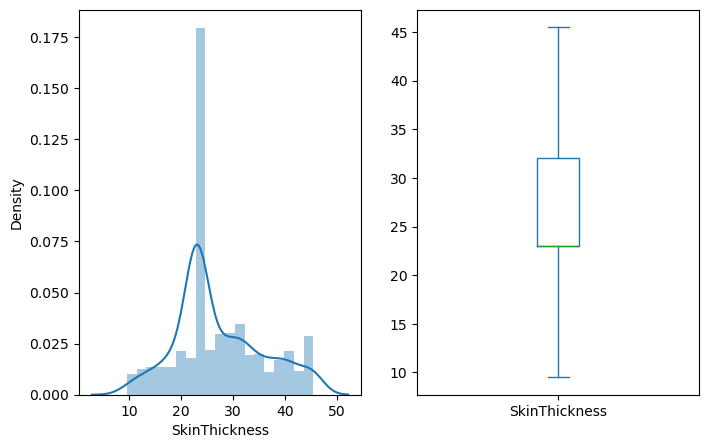

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


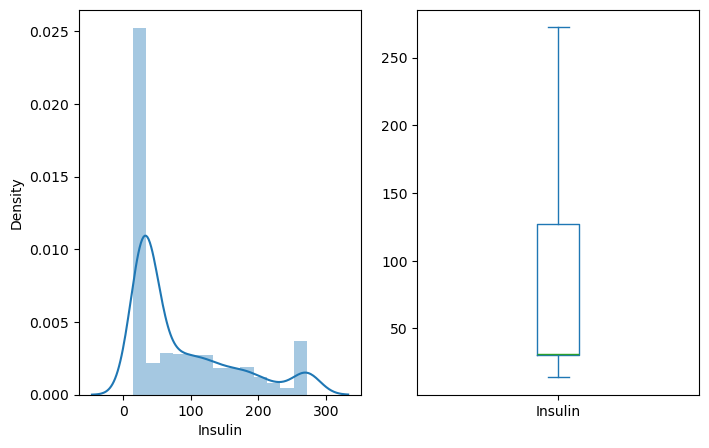

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


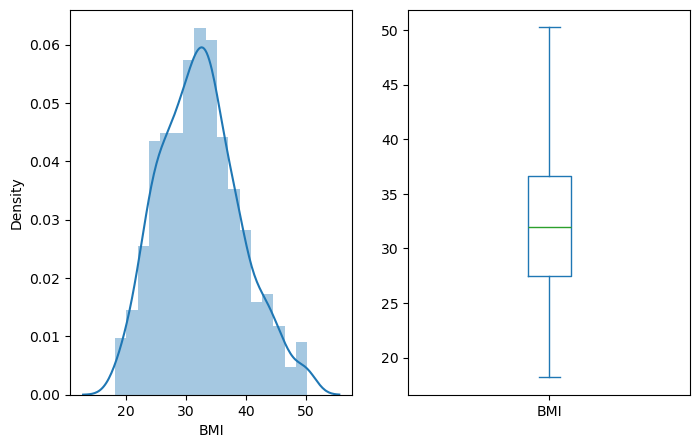

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


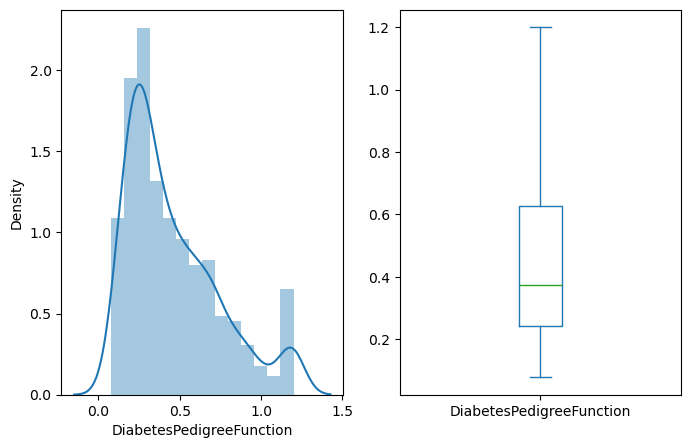

C:\Users\USER\AppData\Local\Temp\ipykernel_5808\4015788334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


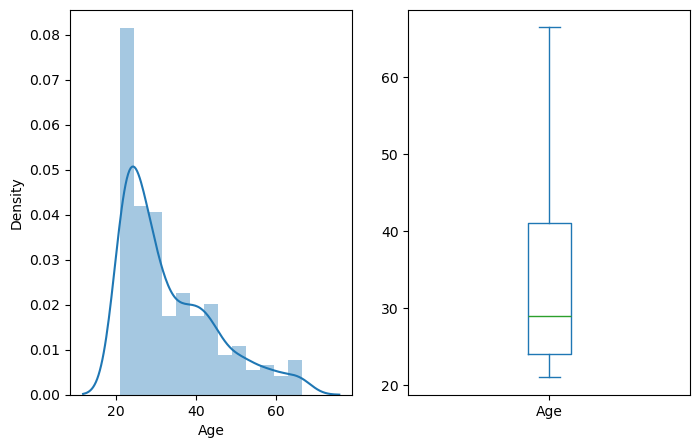

In [26]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    plt.subplot(121)
    sns.distplot(df[i])
    plt.subplot(122)
    df[i].plot.box(figsize=(8,5))
    plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

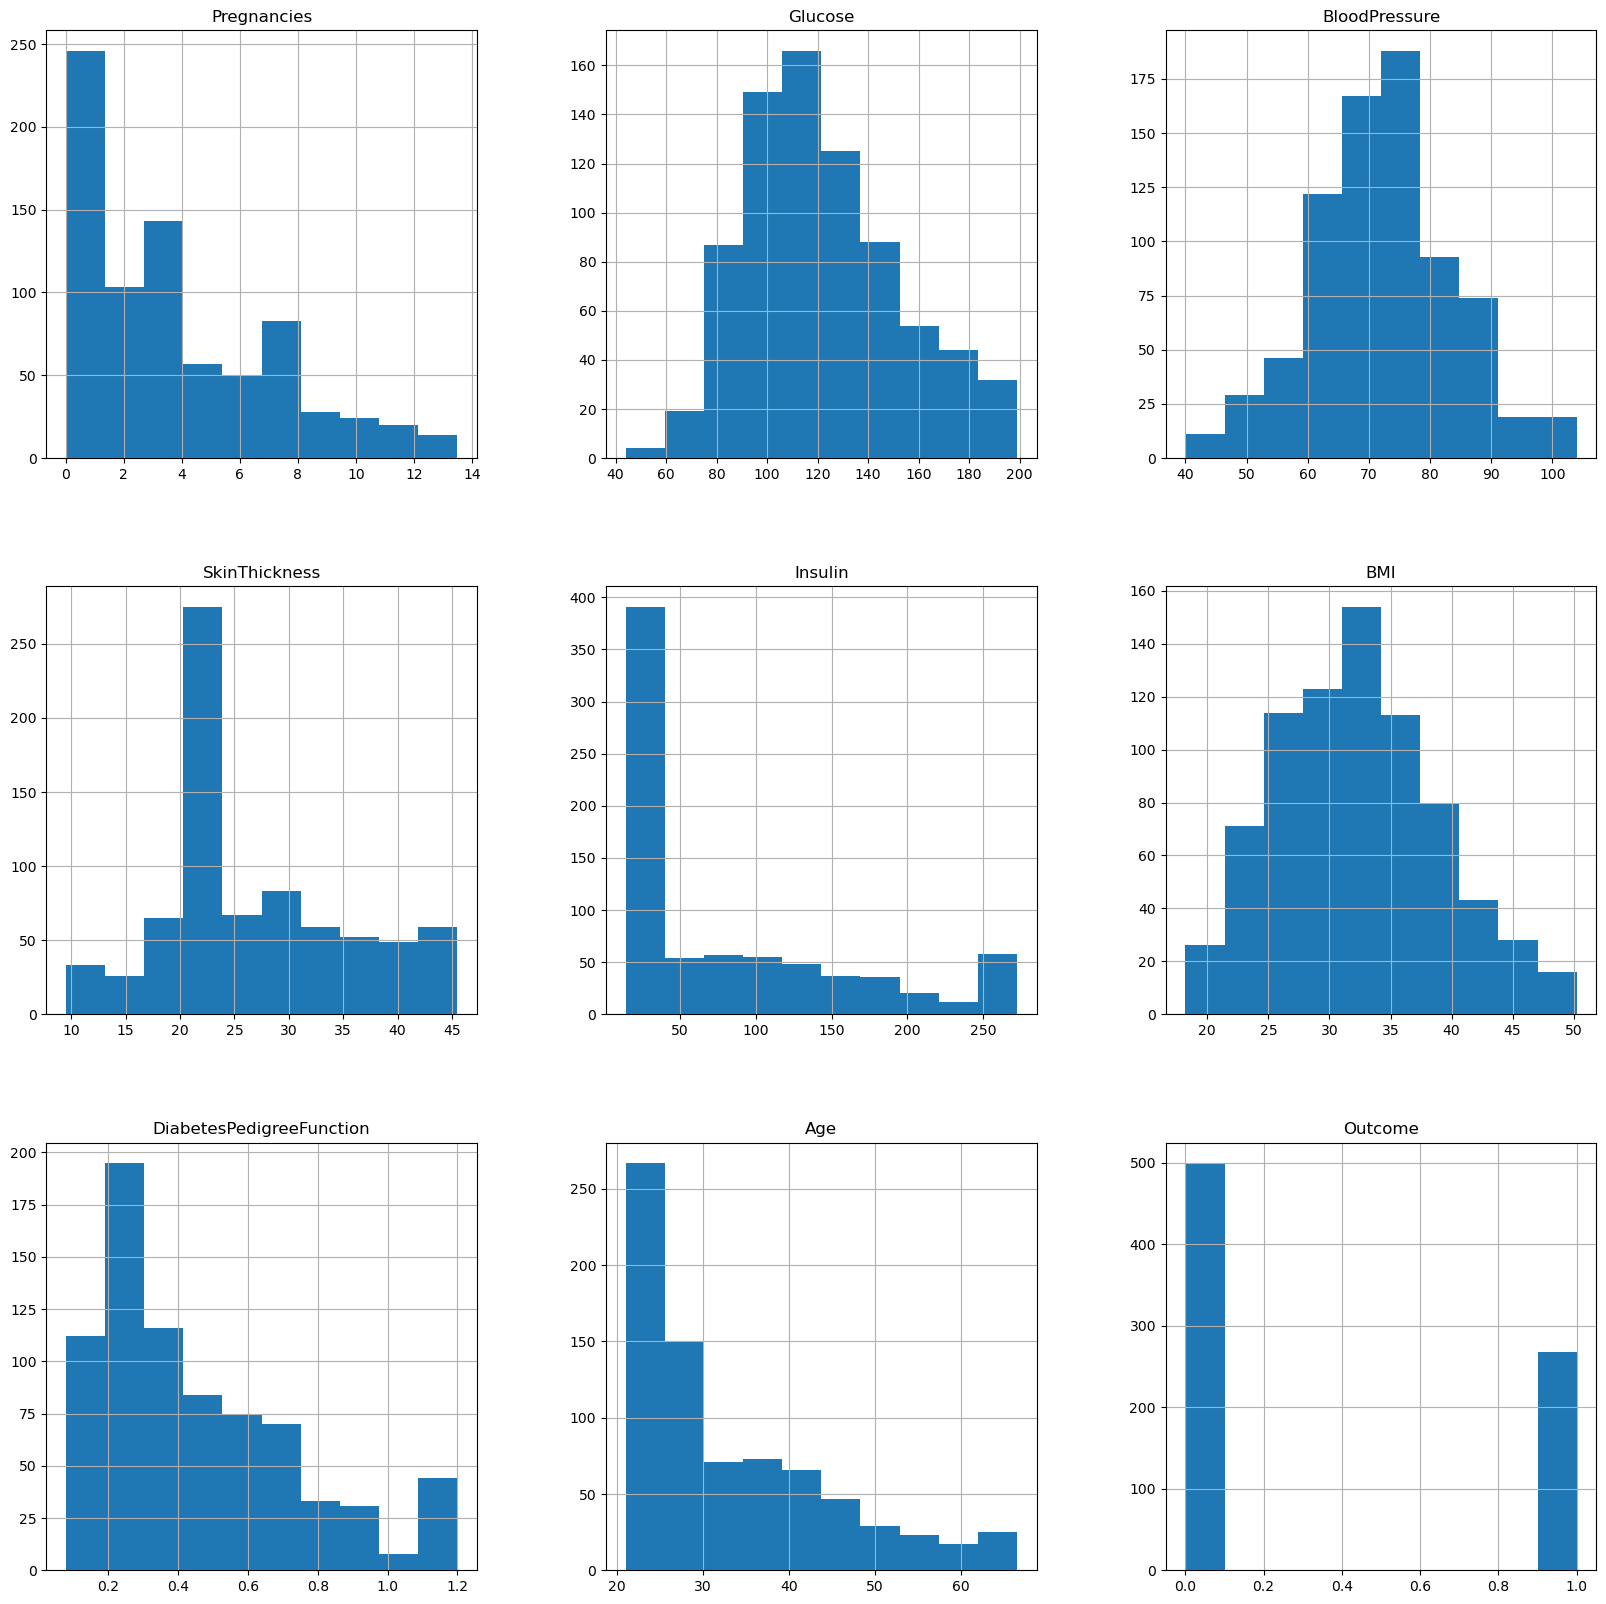

In [27]:
df.hist(figsize = (20,20))

Text(0.5, 1.0, 'Feature Correlation')

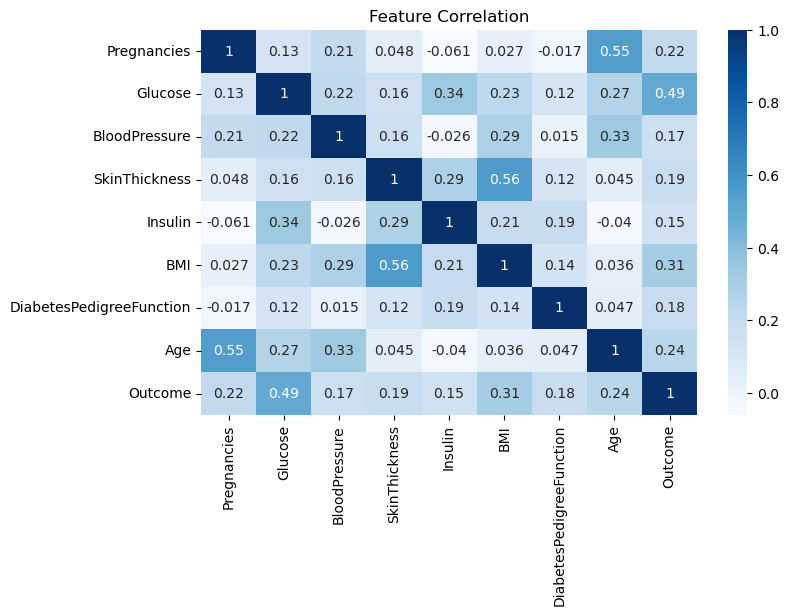

In [28]:
#Correlation plot
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation")

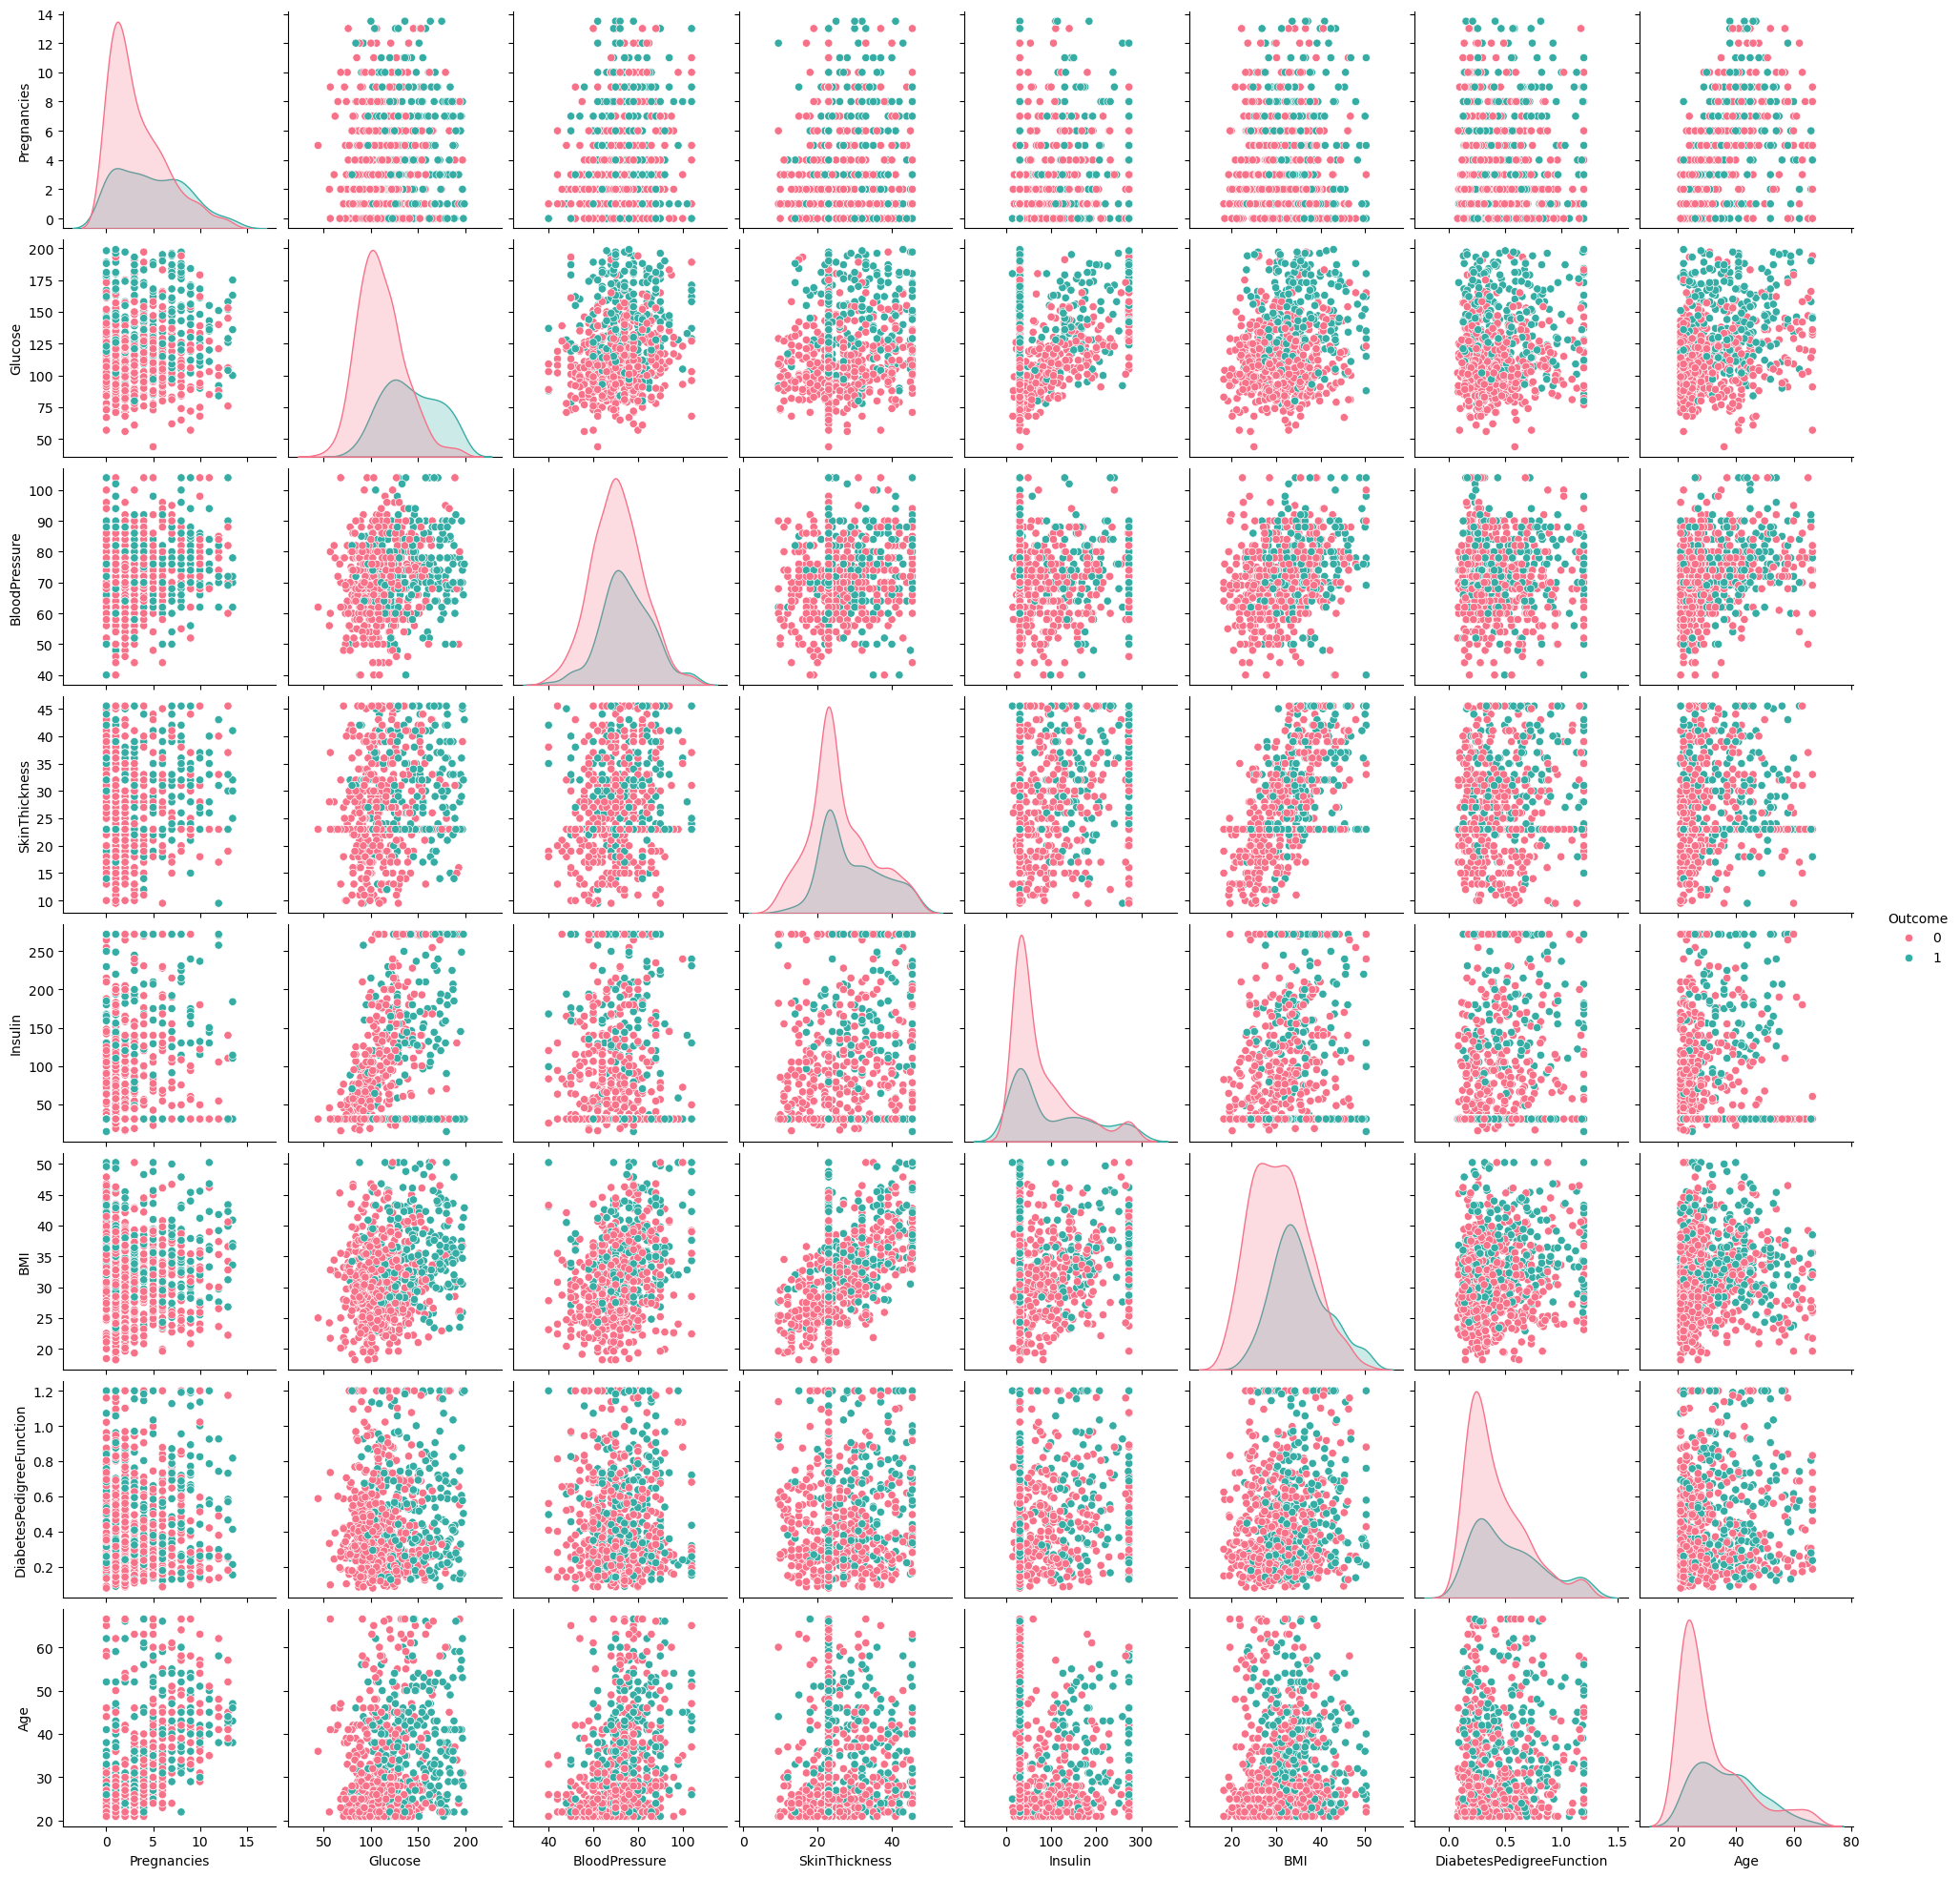

In [29]:
sns.pairplot(df, hue='Outcome', palette="husl")

In [30]:
X = df.drop('Outcome', axis=1) 
Y = df['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [31]:
# scale training data
scale = StandardScaler();
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [33]:
# Train Naive Bayes model (GaussianNB) with default parameters
nb= GaussianNB()
nb.fit(X_train_scaled, Y_train)

# Evaluate model before tuning
train_preds = nb.predict(X_train_scaled)
test_preds = nb.predict(X_test_scaled)

train_acc = accuracy_score(Y_train, train_preds)
test_acc = accuracy_score(Y_test, test_preds)

print('Train accuracy before tuning: ', train_acc)
print('Test accuracy before tuning: ', test_acc)

Train accuracy before tuning:  0.745928338762215
Test accuracy before tuning:  0.7467532467532467


Train AUC:  0.8207064498378468
Test AUC:  0.8319559228650137


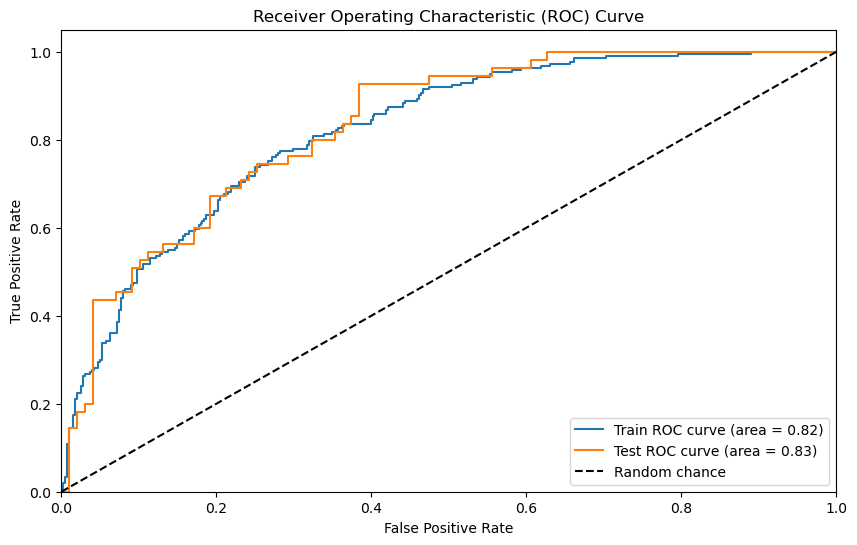

In [34]:
# Predict probabilities instead of labels
train_probs = nb.predict_proba(X_train_scaled)[:, 1]
test_probs = nb.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, train_probs)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, test_probs)

# Calculate AUC
train_auc = roc_auc_score(Y_train, train_probs)
test_auc = roc_auc_score(Y_test, test_probs)

print('Train AUC: ', train_auc)
print('Test AUC: ', test_auc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Compute classification report for the training set

train_report = classification_report(Y_train, train_preds)
print("Classification Report - Training Set")
print(train_report)

# Compute classification report for the test set
test_report = classification_report(Y_test, test_preds)
print("Classification Report - Test Set")
print(test_report)

Classification Report - Training Set
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       401
           1       0.64      0.62      0.63       213

    accuracy                           0.75       614
   macro avg       0.72      0.72      0.72       614
weighted avg       0.74      0.75      0.74       614

Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Confusion Matrix - Training Set (Before Tuning):
 [[327  74]
 [ 82 131]]
Confusion Matrix - Test Set (Before Tuning):
 [[76 23]
 [16 39]]


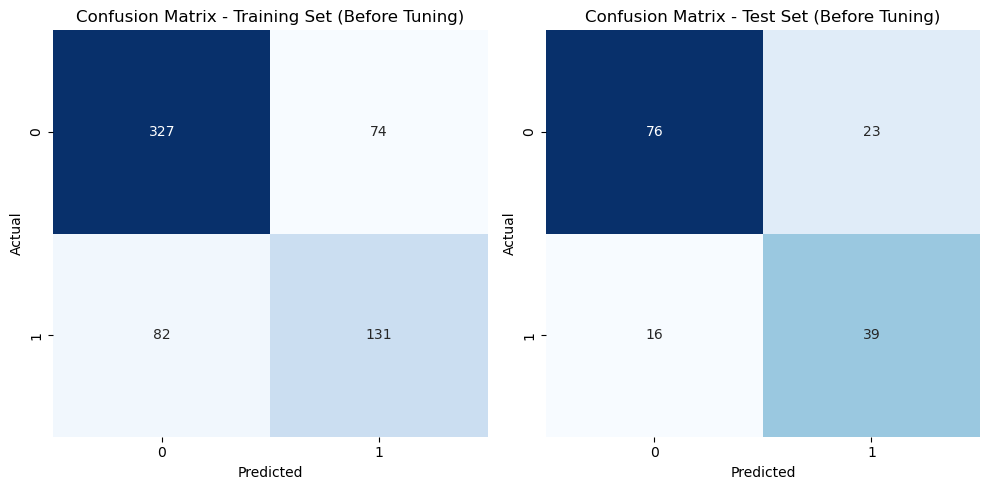

In [36]:
# Compute confusion matrix for training and test sets
train_cm = confusion_matrix(Y_train, train_preds)
test_cm = confusion_matrix(Y_test, test_preds)
print("Confusion Matrix - Training Set (Before Tuning):\n", train_cm)
print("Confusion Matrix - Test Set (Before Tuning):\n", test_cm)

# Plot confusion matrix for training and test sets before tuning
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set (Before Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set (Before Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [37]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
# Hyperparameter Tuning with Randomized Search and Cross-Validation
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Varying the smoothing parameter
}

random_search = RandomizedSearchCV(estimator=GaussianNB(), param_distributions=param_grid,
                                   n_iter=50, cv=cv, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, Y_train)

best_params = random_search.best_params_
print('Best parameters:', best_params)

Best parameters: {'var_smoothing': 1.0}


In [39]:
# Model Evaluation After Tuning
best_nb = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_nb.fit(X_train_scaled, Y_train)

train_preds_after_tuning = best_nb.predict(X_train_scaled)
test_preds_after_tuning = best_nb.predict(X_test_scaled)

train_acc_after_tuning = accuracy_score(Y_train, train_preds_after_tuning)
test_acc_after_tuning = accuracy_score(Y_test, test_preds_after_tuning)

print('Train accuracy after tuning: ', train_acc_after_tuning)
print('Test accuracy after tuning: ', test_acc_after_tuning)

Train accuracy after tuning:  0.762214983713355
Test accuracy after tuning:  0.7532467532467533


Train AUC:  0.8227553182770773
Test AUC:  0.8218549127640037


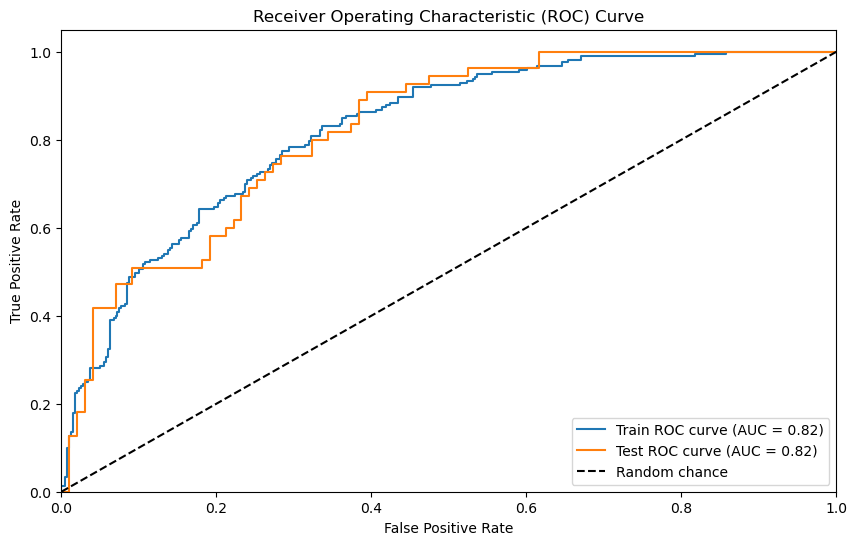

In [40]:
# Predict probabilities using the best model
train_probs = best_nb.predict_proba(X_train_scaled)[:, 1]
test_probs = best_nb.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(Y_train, train_probs)
fpr_test, tpr_test, _ = roc_curve(Y_test, test_probs)

# Calculate AUC
train_auc = roc_auc_score(Y_train, train_probs)
test_auc = roc_auc_score(Y_test, test_probs)

print('Train AUC: ', train_auc)
print('Test AUC: ', test_auc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (AUC = {train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [41]:
# Classification Report
print("Classification Report - Train Set:")
print(classification_report(Y_train, train_preds_after_tuning))

print("Classification Report - Test Set:")
print(classification_report(Y_test, test_preds_after_tuning))

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       401
           1       0.73      0.49      0.59       213

    accuracy                           0.76       614
   macro avg       0.75      0.70      0.71       614
weighted avg       0.76      0.76      0.75       614

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        99
           1       0.72      0.51      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Confusion Matrix - Training Set (After Tuning):
 [[363  38]
 [108 105]]
Confusion Matrix - Test Set (After Tuning):
 [[88 11]
 [27 28]]


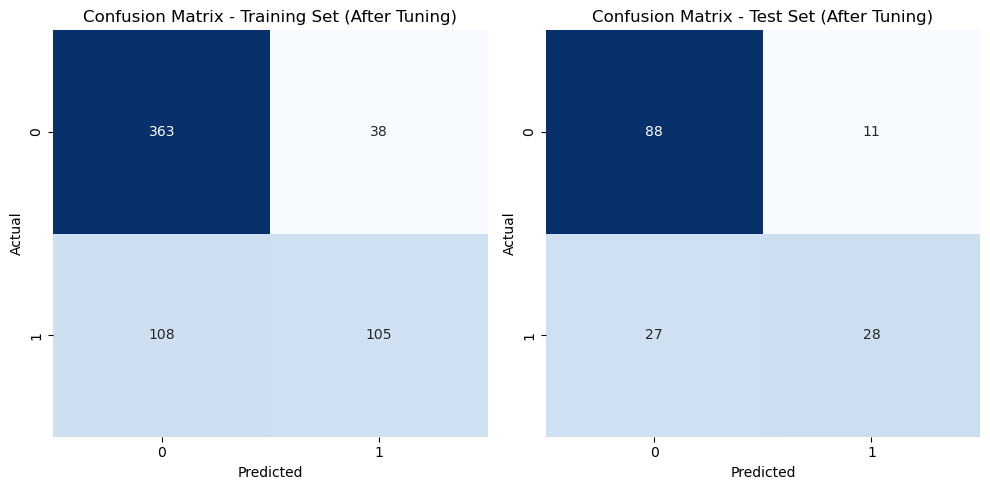

In [42]:
# Generate predictions for the training and test sets using the best model
train_preds = best_nb.predict(X_train_scaled)
test_preds = best_nb.predict(X_test_scaled)

# Compute confusion matrix for training and test sets after tuning
train_cm = confusion_matrix(Y_train, train_preds)
test_cm = confusion_matrix(Y_test, test_preds)
print("Confusion Matrix - Training Set (After Tuning):\n", train_cm)
print("Confusion Matrix - Test Set (After Tuning):\n", test_cm)

# Plot confusion matrix for training and test sets after tuning
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set (After Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set (After Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()